In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=6)

In [2]:
from models import Grid, Ball, Axes, ColladaMesh
from visualization import Viewer

In [3]:
from kr6r900sixx import BaseLink, Link1, Link2, Link3, Link4, Link5, Link6

# Modeling of the KUKA Agilus KR6 R900 sixx

![](kr6r900sixx/images/AGILUS_sixx_EX.jpg)

## Working envelope

![](kr6r900sixx/images/working_envelope.png)

## Direction of rotation of robot axes

![](kr6r900sixx/images/direction_of_rotation_of_robot_axes_cropped.png)

![](kr6r900sixx/images/range_of_motion.png)

## Denavit-Hartenberg parameters

In [4]:
dh_a = np.array([0.025, 0.455, 0.035, 0.0, 0.0, 0.0])
dh_alpha = np.array([-np.pi/2, 0.0, -np.pi/2, np.pi/2, -np.pi/2, 0.0])
dh_d = np.array([0.4, 0.0, 0.0, 0.42, 0.0, 0.08])
q_zero_offset = np.array([0.0,0.0,-np.pi/2,0.0,0.0,0.0])
joint_direction = np.array([-1, 1, 1, -1, 1, -1])

In [5]:
np.vstack((dh_a, dh_alpha, dh_d, q_zero_offset)).T

array([[ 0.025   , -1.570796,  0.4     ,  0.      ],
       [ 0.455   ,  0.      ,  0.      ,  0.      ],
       [ 0.035   , -1.570796,  0.      , -1.570796],
       [ 0.      ,  1.570796,  0.42    ,  0.      ],
       [ 0.      , -1.570796,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.08    ,  0.      ]])

In [34]:
q_home = np.array([0.0, -np.pi/2, np.pi/2, 0.0, 0.0, 0.0])
print(q_home)

[ 0.       -1.570796  1.570796  0.        0.        0.      ]


In [35]:
q_zero = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
print(q_zero)

[0. 0. 0. 0. 0. 0.]


In [36]:
def dh(a, alpha, d, theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    ca = np.cos(alpha)
    sa = np.sin(alpha)
    return np.array([[ct, -st * ca,  st * sa, a * ct],
                     [st,  ct * ca, -ct * sa, a * st],
                     [0.0,      sa,       ca, d],
                     [0.0,     0.0,      0.0, 1.0]])

## Link transformations

In [37]:
A1 = dh(dh_a[0], dh_alpha[0], dh_d[0], q_home[0] + q_zero_offset[0])
A2 = dh(dh_a[1], dh_alpha[1], dh_d[1], q_home[1] + q_zero_offset[1])
A3 = dh(dh_a[2], dh_alpha[2], dh_d[2], q_home[2] + q_zero_offset[2])
A4 = dh(dh_a[3], dh_alpha[3], dh_d[3], q_home[3] + q_zero_offset[3])
A5 = dh(dh_a[4], dh_alpha[4], dh_d[4], q_home[4] + q_zero_offset[4])
A6 = dh(dh_a[5], dh_alpha[5], dh_d[5], q_home[5] + q_zero_offset[5])

## Forward Kinematics

In [38]:
T01 = A1
T02 = A1 @ A2
T03 = A1 @ A2 @ A3
T04 = A1 @ A2 @ A3 @ A4
T05 = A1 @ A2 @ A3 @ A4 @ A5
T06 = A1 @ A2 @ A3 @ A4 @ A5 @ A6

In [39]:
print(T02)

[[ 0.     1.     0.     0.025]
 [-0.     0.     1.    -0.   ]
 [ 1.    -0.     0.     0.855]
 [ 0.     0.     0.     1.   ]]


## Visualization

In [71]:
viewer = Viewer()
grid = Grid()
viewer.add(grid)

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.66, positi…

In [72]:
base_link = BaseLink()
viewer.add(base_link)

In [73]:
link_1 = Link1()
viewer.add(link_1)

In [74]:
link_2 = Link2()
viewer.add(link_2)

In [75]:
link_3 = Link3()
viewer.add(link_3)

In [76]:
link_4 = Link4()
link_4.add(Ball(color='white', radius=0.01))
viewer.add(link_4)

In [46]:
link_5 = Link5()
viewer.add(link_5)

In [47]:
link_6 = Link6()
viewer.add(link_6)

### Apply transformations

In [77]:
link_1(T01)
link_2(T02)
link_3(T03)
link_4(T04)
link_5(T05)
link_6(T06)

## Inverse Kinematics

In [78]:
def fk(dh_a, dh_alpha, dh_d, q_zero_offset, q):
    A1 = dh(dh_a[0], dh_alpha[0], dh_d[0], q[0] + q_zero_offset[0])
    A2 = dh(dh_a[1], dh_alpha[1], dh_d[1], q[1] + q_zero_offset[1])
    A3 = dh(dh_a[2], dh_alpha[2], dh_d[2], q[2] + q_zero_offset[2])
    A4 = dh(dh_a[3], dh_alpha[3], dh_d[3], q[3] + q_zero_offset[3])
    A5 = dh(dh_a[4], dh_alpha[4], dh_d[4], q[4] + q_zero_offset[4])
    A6 = dh(dh_a[5], dh_alpha[5], dh_d[5], q[5] + q_zero_offset[5])
    T01 = A1
    T02 = A1 @ A2
    T03 = A1 @ A2 @ A3
    T04 = A1 @ A2 @ A3 @ A4
    T05 = A1 @ A2 @ A3 @ A4 @ A5
    T06 = A1 @ A2 @ A3 @ A4 @ A5 @ A6
    return (T01, T02, T03, T04, T05, T06)

In [81]:
Ts = fk(dh_a, dh_alpha, dh_d, q_zero_offset, q_home)

In [82]:
Ts[5]

array([[ 0.   ,  0.   ,  1.   ,  0.525],
       [-0.   , -1.   ,  0.   ,  0.   ],
       [ 1.   , -0.   , -0.   ,  0.89 ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [86]:
def ik(trf, dh_a, dh_alpha, dh_d, q_zero_offset, front=1, elbow=1, wrist=1):
    ne = trf[:3,0]
    se = trf[:3,1]
    ae = trf[:3,2]
    pe = trf[:3,3]

    d1 = dh_d[0]
    d4 = dh_d[3]
    d6 = dh_d[5]

    a1 = dh_a[0]
    a2 = dh_a[1]
    a3 = dh_a[2]
    
    l3 = np.sqrt(a3 * a3 + d4 * d4)

    pw = pe - d6 * ae

    q1 = np.arctan2(front * pw[1], front*pw[0])

    pty = - (pw[2] - d1)
    ptx = front * (np.sqrt(pw[0] * pw[0] + pw[1] * pw[1]) - front * a1)

    c3 = (ptx * ptx + pty * pty - a2 * a2 - l3 * l3 ) / (2 * a2 * l3)
    s3 = elbow * np.sqrt(1.0 - c3 * c3)
    psi3 = np.arctan2(s3, c3)
    offset3 = np.arctan2(a3, d4)
    q3 = psi3 + offset3

    den2 = (ptx * ptx + pty * pty)
    c2 = (ptx * (a2 + l3 * c3) + pty * l3 * s3) / den2
    s2 = (pty * (a2 + l3 * c3) - ptx * l3 * s3) / den2
    q2 = np.arctan2(s2, c2)

    T01, T02, T03, T04, T05, T06 = fk(dh_a, dh_alpha, dh_d, q_zero_offset, 
                                      np.array([q1, q2, q3, 0.0, 0.0, 0.0]))    

    rot_0_3 = T03[:3,:3]
    rot_3_6 = rot_0_3.T.dot(trf[:3,:3])

    q4 = np.arctan2(wrist * rot_3_6[1,2], wrist * rot_3_6[0,2])
    q5 = -np.arctan2(wrist * np.sqrt(rot_3_6[0,2] * rot_3_6[0,2] + rot_3_6[1,2] * rot_3_6[1,2]), rot_3_6[2,2])
    q6 = np.arctan2(wrist * rot_3_6[2,1], -wrist * rot_3_6[2,0]) 

    return np.array([q1, q2, q3, q4, q5, q6])

In [87]:
q_home

array([ 0.      , -1.570796,  1.570796,  0.      ,  0.      ,  0.      ])

In [88]:
q_ik = ik(T06, dh_a, dh_alpha, dh_d, q_zero_offset, wrist=-1)
q_ik

array([-0.      , -1.570796,  1.570796,  1.570796,  0.      , -1.570796])

In [96]:
T06_ik = fk(dh_a, dh_alpha, dh_d, q_zero_offset, q_ik)[5]
T06_ik

array([[ 0.   ,  0.   ,  1.   ,  0.525],
       [-0.   , -1.   ,  0.   , -0.   ],
       [ 1.   , -0.   , -0.   ,  0.89 ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [97]:
T06

array([[ 0.   ,  0.   ,  1.   ,  0.525],
       [-0.   , -1.   ,  0.   ,  0.   ],
       [ 1.   , -0.   , -0.   ,  0.89 ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [98]:
np.allclose(T06, T06_ik)

True

## Visualize Inverse Kinematics

In [143]:
class AgilusVisualizer:
    def __init__(self):
        self.viewer = Viewer()
        self.grid = Grid()
        self.viewer.add(grid)
        
        self.two_robots = False
        self.initialized = False
        
        self.base_link = BaseLink()
        self.viewer.add(self.base_link)
        self.link_1 = Link1()
        self.viewer.add(self.link_1)
        self.link_2 = Link2()
        self.viewer.add(self.link_2)
        self.link_3 = Link3()
        self.viewer.add(self.link_3)
        self.link_4 = Link4()
        self.viewer.add(self.link_4)
        self.link_5 = Link5()
        self.viewer.add(self.link_5)
        self.link_6 = Link6()
        self.viewer.add(self.link_6)
        
    def show(self, q, q2=None):
        if q2 is not None:
            mat = self.link_1.mesh.children[0].material
            mat.transparent = True
            mat.opacity = 0.5
            mat = self.link_2.mesh.children[0].material
            mat.transparent = True
            mat.opacity = 0.5
            mat = self.link_3.mesh.children[0].material
            mat.transparent = True
            mat.opacity = 0.5
            mat = self.link_4.mesh.children[0].material
            mat.transparent = True
            mat.opacity = 0.5
            mat = self.link_5.mesh.children[0].material
            mat.transparent = True
            mat.opacity = 0.5
            mat = self.link_6.mesh.children[0].material
            mat.transparent = True
            mat.opacity = 0.5
            
            if not self.two_robots:
                self.base_link = BaseLink()
                self.link_1_2 = Link1()
                self.viewer.add(self.link_1_2)
                self.link_2_2 = Link2()
                self.viewer.add(self.link_2_2)
                self.link_3_2 = Link3()
                self.viewer.add(self.link_3_2)
                self.link_4_2 = Link4()
                self.viewer.add(self.link_4_2)
                self.link_5_2 = Link5()
                self.viewer.add(self.link_5_2)
                self.link_6_2 = Link6()
                self.viewer.add(self.link_6_2)
                
            self.two_robots = True
                
            T01, T02, T03, T04, T05, T06 = fk(dh_a, dh_alpha, dh_d, q_zero_offset, q2)
            self.link_1_2(T01)
            self.link_2_2(T02)
            self.link_3_2(T03)
            self.link_4_2(T04)
            self.link_5_2(T05)
            self.link_6_2(T06)
            
        T01, T02, T03, T04, T05, T06 = fk(dh_a, dh_alpha, dh_d, q_zero_offset, q)
        self.link_1(T01)
        self.link_2(T02)
        self.link_3(T03)
        self.link_4(T04)
        self.link_5(T05)
        self.link_6(T06)

In [144]:
vis = AgilusVisualizer()

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.66, positi…

In [145]:
vis.show(q_home)

In [146]:
vis.show(q_zero)

In [147]:
q = np.array([1,-np.pi/2,np.pi/2,-2,1,1])

In [148]:
vis.show(q)

In [149]:
Ts = fk(dh_a, dh_alpha, dh_d, q_zero_offset, q)
T = Ts[5]
print(T)

[[-0.272382 -0.223901  0.935776  0.315297]
 [ 0.715197 -0.697706  0.041238  0.377754]
 [ 0.643663  0.680496  0.350175  0.918014]
 [ 0.        0.        0.        1.      ]]


In [114]:
q_ik = ik(T, dh_a, dh_alpha, dh_d, q_zero_offset, wrist=-1, front=-1, elbow=1)
q_ik

array([-2.141593, -2.989286,  1.453524,  2.195963,  1.233396, -0.843534])

In [115]:
vis.show(q_ik)

In [116]:
vis.show(q, q_ik)

## Iterative Inverse Kinematics

In [117]:
def Jacobian(Ts):
    p0 = np.array([0, 0, 0])
    z0 = np.array([0, 0, 1])
    pn = Ts[5][:3, 3]
    J = np.zeros((6, 6))
    J[:3, 0] = np.cross(z0, pn-p0)
    J[3:, 0] = z0
    for i in range(5):
        T = Ts[i]
        zi = T[:3, 2]
        pi = T[:3, 3]
        J[:3, i+1] = np.cross(zi, pn-pi)
        J[3:, i+1] = zi 
    return J

In [119]:
Jacobian(Ts)

array([[-0.377754,  0.279884,  0.034047,  0.023573, -0.003299, -0.      ],
       [ 0.315297,  0.435894,  0.053024, -0.015136, -0.077882, -0.      ],
       [ 0.      , -0.463224, -0.463224, -0.061212,  0.017988,  0.      ],
       [ 0.      , -0.841471, -0.841471,  0.540302,  0.350175,  0.935776],
       [ 0.      ,  0.540302,  0.540302,  0.841471, -0.224845,  0.041238],
       [ 1.      ,  0.      ,  0.      , -0.      , -0.909297,  0.350175]])

In [155]:
def ik_iterative(trf, q0):
    Rd = trf[:3,:3]
    qk = q0
    qs = []
    for i in range(1000):
        Ts = fk(dh_a, dh_alpha, dh_d, q_zero_offset, qk)
        Tk = Ts[5]
        Jk = Jacobian(Ts)
        Rk = Tk[:3,:3]
        Re = Rd @ Rk.T
        ep = trf[:3,3] - Tk[:3,3]
        eo = np.array([Re[2,1] - Re[1,2], 
                       Re[0,2]-  Re[2,0], 
                       Re[1,0] - Re[0,1]]) * 0.5

        e = np.array((ep, eo)).reshape(6,1)

        K = 0.1
        dq = K * np.dot(np.linalg.pinv(Jk),e).ravel()
        qk = qk + dq 
        qs.append(qk)

        if np.linalg.norm(e) < 1e-3:
            print(i)
            break
    return qk, qs

In [166]:
q_ik_it, qs = ik_iterative(T, np.array([0,-1,1,-1,1,0]))
q_ik_it

71


array([ 0.999418, -1.570958,  1.571034, -1.999392,  0.999819,  0.999784])

In [167]:
import matplotlib.pyplot as plt

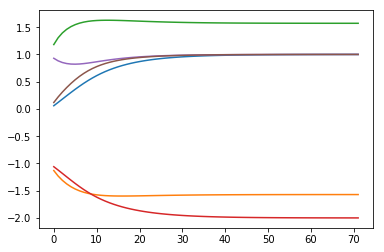

In [168]:
plt.plot(np.array(qs))

In [169]:
fk(dh_a, dh_alpha, dh_d, q_zero_offset, q_ik_it)[5]

array([[-0.271653, -0.223847,  0.936001,  0.315494],
       [ 0.715331, -0.697595,  0.040777,  0.377517],
       [ 0.643821,  0.680628,  0.349628,  0.917938],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

In [170]:
fk(dh_a, dh_alpha, dh_d, q_zero_offset, q_ik)[5]

array([[-0.272382, -0.223901,  0.935776,  0.315297],
       [ 0.715197, -0.697706,  0.041238,  0.377754],
       [ 0.643663,  0.680496,  0.350175,  0.918014],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

In [171]:
vis2 = AgilusVisualizer()

Renderer(camera=PerspectiveCamera(aspect=1.5, children=(DirectionalLight(color='white', intensity=0.66, positi…

In [173]:
for q in qs:
    vis2.show(q_ik, q)
    time.sleep(0.01)

In [139]:
import time